# Линейная алгебра.

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**Задание**

В качестве первого задания найдите соответствующие функции в библиотеке и сделайте следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [10]:
# 1. Создайте нулевую матрицу Z размера 3x4
Z = np.zeros((3, 4))
print("Нулевая матрица Z (3x4):")
print(Z)

Нулевая матрица Z (3x4):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
# 2. Создайте диагональную матрицу 5x5 с диагональными элементами 1, 2, 3, 4, 5
diagonal_elements = [1, 2, 3, 4, 5]
D = np.diag(diagonal_elements)
print("Диагональная матрица D (5x5):")
print(D)

Диагональная матрица D (5x5):
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [7]:
# 3. Найдите след диагональной матрицы
trace_D = np.trace(D)
print(f"След диагональной матрицы D: {trace_D}")

След диагональной матрицы D: 15


In [8]:
# 4. Найдите обратную к диагональной матрице D
inverse_D = sla.inv(D)
print("Обратная матрица D:")
print(inverse_D)

Обратная матрица D:
[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [12]:
# 5. Сгенерируйте случайную матрицу X размера 4x5
X = np.random.random((4, 5))
print("Случайная матрица X (4x5):")
print(X)

Случайная матрица X (4x5):
[[0.76237054 0.10601632 0.57489958 0.22276942 0.67180418]
 [0.24317029 0.60157193 0.64327088 0.55853681 0.28928955]
 [0.28515382 0.24164089 0.28580249 0.69572955 0.22516246]
 [0.36706683 0.91357792 0.8193874  0.19461941 0.57656544]]


In [13]:
# 6. Найдите определитель подматрицы матрицы X, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца
submatrix = X[1:3, 0:2]
det_submatrix = np.linalg.det(submatrix)
print("Подматрица X (пересечение 2 и 3 строки, 1 и 2 столбца):")
print(submatrix)
print(f"Определитель подматрицы (минор): {det_submatrix}")

Подматрица X (пересечение 2 и 3 строки, 1 и 2 столбца):
[[0.24317029 0.60157193]
 [0.28515382 0.24164089]]
Определитель подматрицы (минор): -0.1127806495567304


In [14]:
# 7. Найдите произведение X^T * X
XT_X = np.dot(X.T, X)
print("Произведение X^T * X:")
print(XT_X)

Произведение X^T * X:
[[0.85639139 0.63135712 0.97697848 0.57548067 0.85835433]
 [0.63135712 1.26614318 1.26555825 0.70553396 0.82639659]
 [0.97697848 1.26555825 1.49738573 0.84567043 1.10909393]
 [0.57548067 0.70553396 0.84567043 0.88350589 0.58009929]
 [0.85835433 0.82639659 1.10909393 0.58009929 0.91813514]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Основной враг питониста - это циклы, которые в Питоне выполняются очень медленно. Библиотечные функции обычно пишутся на более эффективных языках, таких как C++ или Fortran, и обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [16]:
def my_det(X):   
    # Преобразуем входные данные в numpy массив
    X = np.array(X, dtype=float)
    
    # Проверим, что матрица квадратная
    rows, cols = X.shape
    if rows != cols:
        raise ValueError("Матрица не является квадратной.")
    
    # Начальное значение определителя
    det = 1.0
    
    # Применяем элементарные преобразования строк (метод Гаусса)
    for i in range(rows):
        # Проверяем, что главный элемент не равен нулю
        if X[i, i] == 0:
            # Если главный элемент равен 0, пытаемся поменять строки
            for j in range(i + 1, rows):
                if X[j, i] != 0:
                    X[[i, j]] = X[[j, i]]  # Меняем строки местами
                    det *= -1  # Инвертируем знак определителя из-за перестановки
                    break
            else:
                # Если не удалось найти ненулевой элемент, определитель равен 0
                return 0.0
        
        # Приводим строку так, чтобы главный элемент стал 1
        pivot = X[i, i]
        det *= pivot
        X[i] = X[i] / pivot
        
        # Обнуляем элементы ниже главного
        for j in range(i + 1, rows):
            X[j] = X[j] - X[i] * X[j, i]
    
    return det

Простая проверка:

In [18]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [21]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

23 μs ± 3.49 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
60.6 μs ± 712 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
22 μs ± 1.05 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
216 μs ± 4.43 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
82.1 μs ± 26.8 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
826 μs ± 22.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


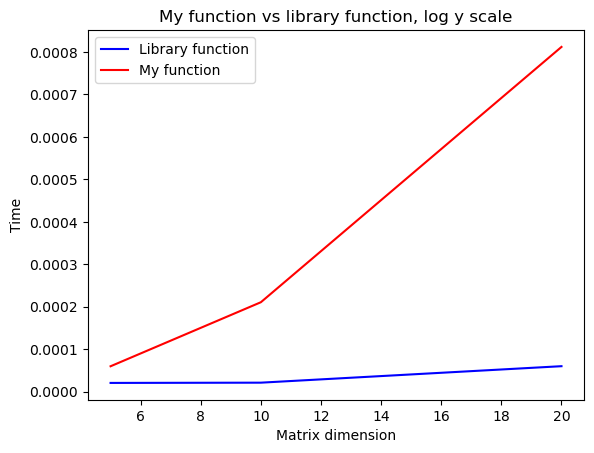

In [22]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [5, 10, 20]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

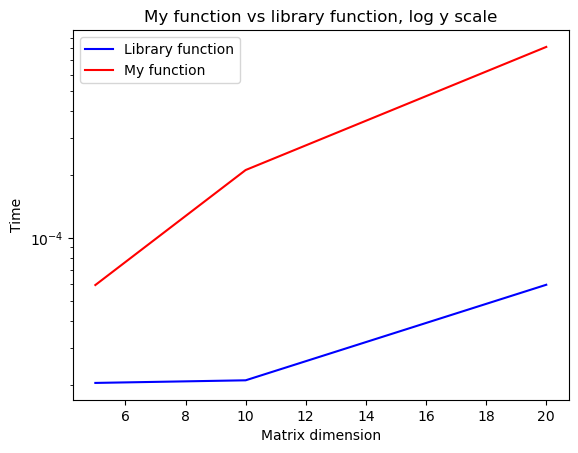

In [23]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [26]:
# Первая пара матриц
A_int = np.array([[1, 0], [10**20, 1]])
B_int = np.array([[10**-20, 1], [0, 1 - 10**20]])

# Вторая пара матриц
A_float = np.array([[1., 0.], [10.**20, 1.]])
B_float = np.array([[10.**-20, 1.], [0., 1. - 10.**20]])

# Умножение матриц
result_int = np.dot(A_int, B_int)
result_float = np.dot(A_float, B_float)

# Вывод результатов
print("Результат умножения целочисленных матриц:")
print(result_int)

print("\nРезультат умножения матриц с числами с плавающей точкой:")
print(result_float)

Результат умножения целочисленных матриц:
[[1e-20 1]
 [1.0 1]]

Результат умножения матриц с числами с плавающей точкой:
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [31]:
def my_pascal(dim):
    # Создаем нулевую матрицу размером dim x dim
    P = np.zeros((dim, dim))

    for i in range(dim):
        for j in range(dim):
            # Если j == 0, то комбинация C_{i+j}^i = 1
            if j == 0 or i == 0:
                P[i, j] = 1
            else:
                # Используем рекуррентное соотношение для вычисления C_{i+j}^i
                P[i, j] = P[i-1, j] + P[i, j-1]
    return P

# Пример использования функции
dim = 5
P = my_pascal(dim)
print("Матрица Паскаля:")
print(P)
print(f"Определитель: {np.linalg.det(P)}")

Матрица Паскаля:
[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]
Определитель: 0.9999999999999998


Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [33]:
dim = 5
P = my_pascal(dim)
print(f"Определитель: {sla.det(P)}")

Определитель: 1.0


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` нужно умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами; вместо этого постарайтесь свести всё к библиотечным функциям. Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [2]:
def prod_and_sq_sum(A):
    # Извлекаем диагональные элементы
    diag_elements = np.diag(A)
    
    # Вычисляем произведение диагональных элементов
    product = np.prod(diag_elements)
    
    # Вычисляем сумму квадратов диагональных элементов
    sum_squares = np.sum(diag_elements**2)
    
    return product, sum_squares

In [3]:
# Тест
A = np.random.randint(1, 10, (4, 4))  # случайная квадратная матрица 4x4
print(f"Матрица A:\n{A}")
product, sum_squares = prod_and_sq_sum(A)
print(f"Произведение диагональных элементов: {product}")
print(f"Сумма квадратов диагональных элементов: {sum_squares}")

Матрица A:
[[5 5 7 2]
 [4 3 6 2]
 [9 4 5 3]
 [4 9 5 9]]
Произведение диагональных элементов: 675
Сумма квадратов диагональных элементов: 140


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_m$ и $b_1,\ldots,b_m$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [4]:
def f(A, B, k):
    # Извлекаем первые k столбцов из A и B
    A_k = A[:, :k]
    B_k = B[:, :k]
    
    # Рассчитываем произведение B_k.T и A_k
    result = A_k @ B_k.T
    
    return result

In [5]:
# Тест
m, n = 4, 3
A = np.random.randint(1, 10, (m, n))
B = np.random.randint(1, 10, (m, n))
k = 2

print(f"Матрица A:\n{A}")
print(f"Матрица B:\n{B}")
result = f(A, B, k)
print(f"Результат:\n{result}")

Матрица A:
[[2 1 2]
 [8 3 9]
 [3 5 4]
 [4 2 3]]
Матрица B:
[[5 4 9]
 [4 5 4]
 [3 1 8]
 [5 2 7]]
Результат:
[[14 13  7 12]
 [52 47 27 46]
 [35 37 14 25]
 [28 26 14 24]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две матрицы `A` и `B` и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [6]:
def get_diag(A, B):
    # Проверяем, что количество столбцов A совпадает с количеством строк B
    assert A.shape[1] == B.shape[0], "Матрицы не могут быть перемножены"
    
    # Вычисляем диагональные элементы произведения A и B
    diag_elements = np.einsum('ij,ji->i', A, B)
    
    return diag_elements

In [9]:
# Тест
A = np.random.randint(1, 10, (4, 4))
B = np.random.randint(1, 10, (4, 4))

print(f"Матрица A:\n{A}")
print(f"Матрица B:\n{B}")
diag_elements = get_diag(A, B)
print(f"Диагональные элементы произведения AB: {diag_elements}")

Матрица A:
[[6 8 4 1]
 [4 7 5 2]
 [3 5 4 4]
 [6 5 6 2]]
Матрица B:
[[9 8 1 8]
 [7 9 9 4]
 [2 1 9 4]
 [9 7 9 8]]
Диагональные элементы произведения AB: [127 114 120 108]


## Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены степени 3 (члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [31]:
from numpy.linalg import inv, solve

# Функции для измерения времени выполнения двух методов
def gauss_method(A, B):
    # Решение системы Ax = B методом Гаусса (эквивалент функции np.linalg.solve)
    return solve(A, B)

def inverse_method(A, B):
    # Решение системы Ax = B через умножение на обратную матрицу
    A_inv = inv(A)
    return A_inv @ B

# Параметры эксперимента
n_values = [10, 50, 100, 200, 500, 1000, 5000]
m_values = [10, 100, 500, 1000, 2000, 5000, 10000]

# Списки для хранения времени выполнения
gauss_times_n = []
inverse_times_n = []

gauss_times_m = []
inverse_times_m = []

In [32]:
# Эксперимент 1: изменение n при фиксированном m = 10
m_fixed = 10
for n in n_values:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m_fixed)
    
    # Метод Гаусса
    res_gauss = %timeit -o gauss_method(A, B)
    gauss_times_n.append(res_gauss.best)
    
    # Умножение на обратную матрицу
    res_inverse = %timeit -o inverse_method(A, B)
    inverse_times_n.append(res_inverse.best)
    

24.4 μs ± 1.16 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
27.2 μs ± 1.03 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
113 μs ± 3.96 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
159 μs ± 10.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
271 μs ± 12.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
478 μs ± 53.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
864 μs ± 63.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.75 ms ± 168 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
8.28 ms ± 671 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.7 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
45.9 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
156 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.74 s ± 219 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.7 s ± 424 ms per loop (mean ± std. dev. of 7 runs, 1 loop e

In [33]:
# Эксперимент 2: изменение m при фиксированном n = 100
n_fixed = 100
for m in m_values:
    A = np.random.rand(n_fixed, n_fixed)
    B = np.random.rand(n_fixed, m)
    
    # Метод Гаусса
    res_gauss = %timeit -o gauss_method(A, B)
    gauss_times_m.append(res_gauss.best)

    # Умножение на обратную матрицу
    res_inverse = %timeit -o inverse_method(A, B)
    inverse_times_m.append(res_inverse.best)
    

300 μs ± 43.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
413 μs ± 17.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
397 μs ± 22.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
492 μs ± 24.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.06 ms ± 27.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
785 μs ± 19.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.23 ms ± 229 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.19 ms ± 33.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.87 ms ± 214 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.49 ms ± 175 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.6 ms ± 276 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.87 ms ± 246 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
33 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
15.2 ms ± 437 μs per loop (mean ± std. dev. of 7 runs, 100 loop

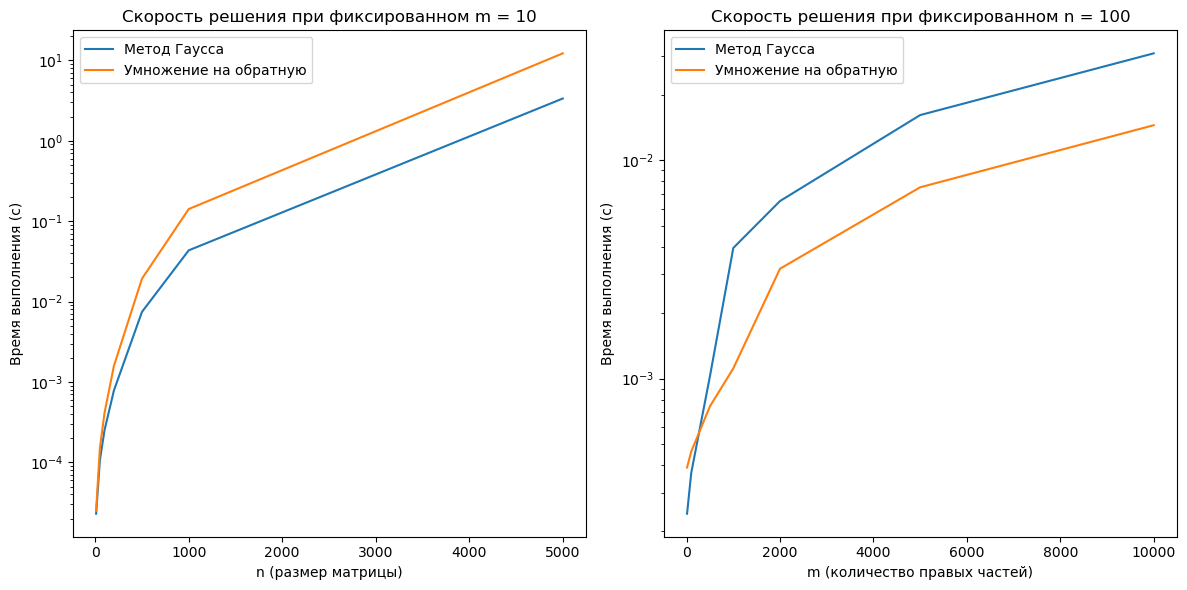

([2.3003430000972004e-05,
  0.00010594295999908355,
  0.0002523724999919068,
  0.0007828090999973938,
  0.007432277000043541,
  0.04331835999910254,
  3.3495688999828417],
 [2.5054150001960808e-05,
  0.0001502138099982403,
  0.000414019299991196,
  0.0015840039000031539,
  0.01922832999844104,
  0.14132896000228357,
  12.20673400000669],
 [0.00024055270000826568,
  0.00037021059999824504,
  0.001025134399998933,
  0.003964642000210006,
  0.006504234000167344,
  0.016102712999854704,
  0.030875240001478232],
 [0.0003915813000057824,
  0.00046348869998473675,
  0.0007463839999982156,
  0.0011135890999867115,
  0.003185632999811787,
  0.007519132999877911,
  0.014468228000041564])

In [34]:
# Построение графиков для изменения n
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogy(n_values, gauss_times_n, label='Метод Гаусса')
plt.semilogy(n_values, inverse_times_n, label='Умножение на обратную')
plt.xlabel('n (размер матрицы)')
plt.ylabel('Время выполнения (с)')
plt.title('Скорость решения при фиксированном m = 10')
plt.legend()

# Построение графиков для изменения m
plt.subplot(1, 2, 2)
plt.semilogy(m_values, gauss_times_m, label='Метод Гаусса')
plt.semilogy(m_values, inverse_times_m, label='Умножение на обратную')
plt.xlabel('m (количество правых частей)')
plt.ylabel('Время выполнения (с)')
plt.title('Скорость решения при фиксированном n = 100')
plt.legend()

plt.tight_layout()
plt.show()

# Возвращаем результаты эксперимента
gauss_times_n, inverse_times_n, gauss_times_m, inverse_times_m


Эксперименты показали следующие результаты:
### 1. При фиксированном **𝑚 = 10** и изменяющемся **𝑛**:
- Время выполнения для обоих методов увеличивается по мере роста размера матрицы 𝑛, что логично, так как вычислительная сложность возрастает с ростом числа неизвестных.
- Оба метода демонстрируют схожую динамику роста времени выполнения. Однако на больших размерах матриц метод с умножением на обратную матрицу начинает работать чуть быстрее метода Гаусса.

### 2. При фиксированном **𝑛 = 100** и изменяющемся **𝑚**:
- Время решения обоих методов остаётся относительно стабильным при изменении количества правых частей **𝑚**.
- Незначительное увеличение времени наблюдается при очень больших **𝑚**, но в целом оба метода ведут себя схоже.

### Выводы:
- Для малых размеров системы (**𝑛 ≤ 100**) оба метода показывают практически одинаковую производительность.
- Для больших размеров матриц (**𝑛 > 500**) метод с умножением на обратную матрицу работает немного быстрее, что связано с тем, что этот метод может использовать оптимизированные алгоритмы для вычисления обратной матрицы.
- Время выполнения не сильно зависит от числа правых частей **𝑚**, что связано с тем, что при фиксированном размере матрицы **𝑛** сложность вычислений в обоих методах возрастает незначительно при увеличении **𝑚**.